In [1]:
import numpy as np 
import torch 
torch.set_printoptions(edgeitems=2, threshold=50)

#### Image I/O package 

(465, 620, 3)


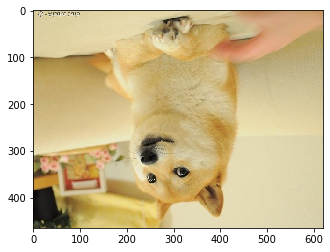

In [2]:
import imageio
import matplotlib.pyplot as plt 

img_arr = imageio.imread('./siba_dog.jpg')
print(img_arr.shape)

plt.imshow(img_arr[::-1])

torch.Size([465, 620, 3])


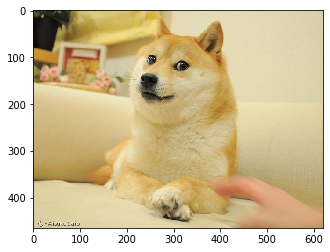

In [3]:
img = torch.from_numpy(img_arr)    # Numpy -> Tensor 
out = img.permute(2, 0, 1)

print(img.shape)
plt.imshow(img)

In [4]:
out.shape

torch.Size([3, 465, 620])

# Batch images 

In [5]:
import os 

dir_path = "./image_cats/"

In [6]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
print(batch.shape)

torch.Size([3, 3, 256, 256])


In [7]:
filenames = [name for name in os.listdir(dir_path) if os.path.splitext(name)[-1] == '.png']
print(filenames)

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(dir_path, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

['cat1.png', 'cat2.png', 'cat3.png']


In [8]:
print(batch.shape)

torch.Size([3, 3, 256, 256])


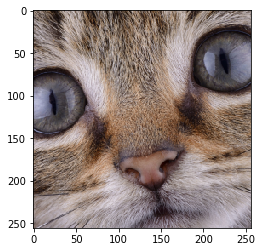

In [9]:
img = batch[0].permute(1,2,0)
#img = batch[1].permute(1,2,0)
#img = batch[2].permute(1,2,0)
plt.imshow(img)

## standardization

In [10]:
print(batch[0])

tensor([[[156, 152,  ..., 149, 158],
         [174, 134,  ..., 136, 138],
         ...,
         [129, 130,  ..., 121, 114],
         [129, 123,  ..., 121, 120]],

        [[139, 135,  ..., 135, 147],
         [160, 119,  ..., 122, 124],
         ...,
         [111, 111,  ..., 112, 105],
         [111, 104,  ..., 110, 111]],

        [[129, 123,  ..., 132, 145],
         [155, 110,  ..., 119, 121],
         ...,
         [108, 108,  ..., 117, 110],
         [107,  98,  ..., 115, 116]]], dtype=torch.uint8)


In [11]:
batch = batch.float()   # unit8 -> float 
batch /= 255.0

In [12]:
print(batch[0])

tensor([[[0.6118, 0.5961,  ..., 0.5843, 0.6196],
         [0.6824, 0.5255,  ..., 0.5333, 0.5412],
         ...,
         [0.5059, 0.5098,  ..., 0.4745, 0.4471],
         [0.5059, 0.4824,  ..., 0.4745, 0.4706]],

        [[0.5451, 0.5294,  ..., 0.5294, 0.5765],
         [0.6275, 0.4667,  ..., 0.4784, 0.4863],
         ...,
         [0.4353, 0.4353,  ..., 0.4392, 0.4118],
         [0.4353, 0.4078,  ..., 0.4314, 0.4353]],

        [[0.5059, 0.4824,  ..., 0.5176, 0.5686],
         [0.6078, 0.4314,  ..., 0.4667, 0.4745],
         ...,
         [0.4235, 0.4235,  ..., 0.4588, 0.4314],
         [0.4196, 0.3843,  ..., 0.4510, 0.4549]]])


In [13]:
n_channels = batch.shape[1]

for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std